In [223]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [224]:
data  = pd.read_csv('Data/train.csv')

In [225]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [226]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255 #By dividing by 255, the 0-255 range can be described with a 0.0-1.0 range
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255

In [227]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def RELU(Z):
    return np.maximum(Z, 0)

def deriv_RELU(Z):
    return Z > 0

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1)) #create a blank matrix of zeros
    one_hot_Y[np.arange(Y.size), Y] = 1 #set appropriate column to 1 - creating labels
    one_hot_Y = one_hot_Y.T #tranpose so each example in column
    return one_hot_Y
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = RELU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2
    
def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size #number of samples 
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_RELU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2



In [228]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if ( i % 50 == 0):
            print("Inteartion: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [229]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Inteartion:  0
[2 6 6 ... 2 3 6] [8 3 1 ... 9 0 8]
Accuracy:  0.06319512195121951
Inteartion:  50
[0 6 5 ... 9 3 0] [8 3 1 ... 9 0 8]
Accuracy:  0.36758536585365853
Inteartion:  100
[8 2 1 ... 8 3 2] [8 3 1 ... 9 0 8]
Accuracy:  0.5984634146341463
Inteartion:  150
[8 2 1 ... 8 5 8] [8 3 1 ... 9 0 8]
Accuracy:  0.6809756097560976
Inteartion:  200
[8 2 1 ... 9 5 8] [8 3 1 ... 9 0 8]
Accuracy:  0.7319268292682927
Inteartion:  250
[8 2 1 ... 9 0 8] [8 3 1 ... 9 0 8]
Accuracy:  0.7670975609756098
Inteartion:  300
[8 2 1 ... 9 0 8] [8 3 1 ... 9 0 8]
Accuracy:  0.7913170731707317
Inteartion:  350
[8 2 1 ... 9 0 8] [8 3 1 ... 9 0 8]
Accuracy:  0.8090487804878049
Inteartion:  400
[8 2 1 ... 9 0 8] [8 3 1 ... 9 0 8]
Accuracy:  0.8217073170731707
Inteartion:  450
[8 2 1 ... 9 0 8] [8 3 1 ... 9 0 8]
Accuracy:  0.8315853658536585


In [235]:
def make_predictions(X, W1, b1, W2, b2):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_iamge = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_iamge = current_iamge.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_iamge, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


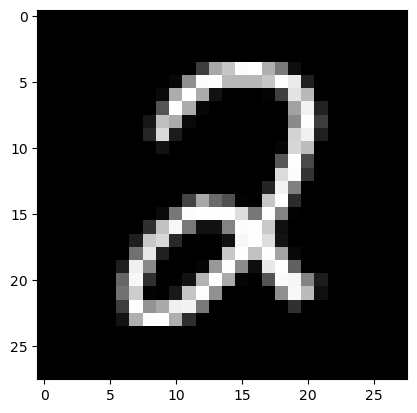

In [238]:
test_prediction(7, W1, b1, W2, b2)